In [3]:
!pip install praw
!pip install nltk
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import praw

user_agent = "kerem"
reddit = praw.Reddit(
    client_id="YO6Dy_4rO-6yMx8PXC0msw",
    client_secret="_Nf2mgAwSJP_bGmJ6NUdHGSCGAtaUQ",
    user_agent=user_agent
)

In [5]:
headlines = set()
for submission in reddit.subreddit('nba').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

762


In [6]:
df = pd.DataFrame(headlines)
df.head()

,0
0,[Highlight] De'Aaron Fox makes the turnaround ...
1,[Slater] Andrew Wiggins is probable for tomorr...
2,The Thunder Have 7 Players Score in Double Fig...
3,Matisse Thybulle has been a potent weapon for ...
4,GAME THREAD: Phoenix Suns (20-18) @ Cleveland ...


In [7]:
df.to_csv('konular.csv', header=False, encoding='utf-8', index=False)

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keremaylanc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as Dosya
veri = Dosya()
results = []

for line in headlines:
    pol_score = veri.polarity_scores(line)
    pol_score['konu'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'konu': "[Highlight] De'Aaron Fox makes the turnaround jump shot to tie the game with less than "
          '7 seconds remaining',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.5267,
  'konu': '[Slater] Andrew Wiggins is probable for tomorrow’s game against the Magic. It is '
          'expected to be the end of the longest absence of his career. He’s missed the previous '
          '15 games. Never missed more than 11 total games in any season.',
  'neg': 0.101,
  'neu': 0.899,
  'pos': 0.0},
 {'compound': 0.5859,
  'konu': 'The Thunder Have 7 Players Score in Double Figures in a 150-117 Win Over the Celtics',
  'neg': 0.0,
  'neu': 0.774,
  'pos': 0.226}]


In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,konu
0,0.000,1.000,0.000,0.0000,[Highlight] De'Aaron Fox makes the turnaround ...
1,0.101,0.899,0.000,-0.5267,[Slater] Andrew Wiggins is probable for tomorr...
2,0.000,0.774,0.226,0.5859,The Thunder Have 7 Players Score in Double Fig...
3,0.217,0.691,0.092,-0.3306,Matisse Thybulle has been a potent weapon for ...
4,0.000,1.000,0.000,0.0000,GAME THREAD: Phoenix Suns (20-18) @ Cleveland ...


In [11]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,konu,label
0,0.000,1.000,0.000,0.0000,[Highlight] De'Aaron Fox makes the turnaround ...,0
1,0.101,0.899,0.000,-0.5267,[Slater] Andrew Wiggins is probable for tomorr...,-1
2,0.000,0.774,0.226,0.5859,The Thunder Have 7 Players Score in Double Fig...,1
3,0.217,0.691,0.092,-0.3306,Matisse Thybulle has been a potent weapon for ...,-1
4,0.000,1.000,0.000,0.0000,GAME THREAD: Phoenix Suns (20-18) @ Cleveland ...,0


In [12]:
df2 = df[['konu', 'label']]

In [13]:
df2.to_csv('Reddit_konular.csv', encoding='utf-8', index=False)

In [14]:
df.label.value_counts()

 0    348
 1    246
-1    168
Name: label, dtype: int64

In [15]:
df.label.value_counts(normalize=True) * 100

 0    45.669291
 1    32.283465
-1    22.047244
Name: label, dtype: float64

In [16]:
print("Olumlu açıklamalar:\n")
pprint(list(df[df['label'] == 1].konu)[:5], width=200)

print("Olumsuz açıklamlar:\n")
pprint(list(df[df['label'] == -1].konu)[:5], width=200)

Olumlu açıklamalar:

['The Thunder Have 7 Players Score in Double Figures in a 150-117 Win Over the Celtics',
 '[Weiss] Marcus Smart was fined $35K by the NBA for his language toward an official as he was ejected in OKC.',
 'How many games would a team of the 8 best players in the league win in a season if they had to play every possession 4 vs 5?',
 '[Highlight] Pacers fan hits a half-court shot to win just $500',
 'Lebron, KD, and Steph Reportedly Wants to Play Until 40s, Can they do it?']
Olumsuz açıklamlar:

['[Slater] Andrew Wiggins is probable for tomorrow’s game against the Magic. It is expected to be the end of the longest absence of his career. He’s missed the previous 15 games. Never missed more '
 'than 11 total games in any season.',
 'Matisse Thybulle has been a potent weapon for the Sixers... so it’s awkward how little he plays',
 "[Highlight] Tari Eason shows hustle to recover the ball then sends it to Jae'Sean Tate who hits a 3 to give the Rockets the lead over the Jazz

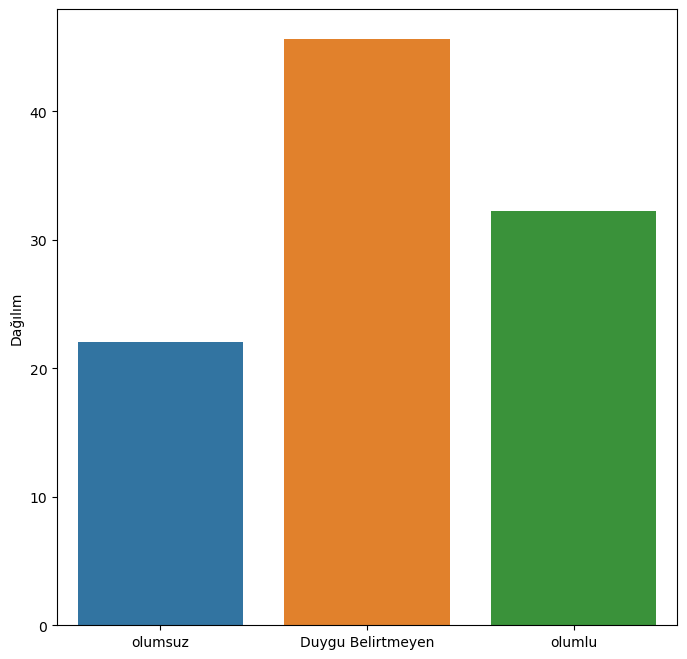

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['olumsuz', 'Duygu Belirtmeyen', 'olumlu'])
ax.set_ylabel("Dağılım")

plt.show()